In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

/home/aditya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_clusters=132
kmeans=tf.contrib.factorization.KMeansClustering(num_clusters=num_clusters, use_mini_batch=False,initial_clusters='kmeans_plus_plus',model_dir='kmeansmodel')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'kmeansmodel', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f69c737aeb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [3]:
image=cv2.imread('palete137.png')

In [4]:
#image1=cv2.resize(image,(1600,1600))
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image.shape

(1338, 1257, 3)

In [5]:
image1=image.reshape(-1,3)

In [6]:
image1.shape

(1681866, 3)

In [7]:
def input_fn():
    return tf.train.limit_epochs(
      tf.convert_to_tensor(image1, dtype=tf.float32), num_epochs=1)

In [ ]:
num_iterations = 20
previous_centers = None
for _ in range(num_iterations):
      kmeans.train(input_fn)
      cluster_centers = kmeans.cluster_centers()
      if previous_centers is not None:
        print ('delta:', cluster_centers - previous_centers)
      previous_centers = cluster_centers
      print ('score:', kmeans.score(input_fn))
print ('cluster centers:', cluster_centers)

In [11]:
cluster_centers_int=np.rint(cluster_centers)
cluster_centers_int=cluster_centers_int.astype(int)

In [13]:
cluster_centers_int.dtype

dtype('int64')

In [15]:
# for i, point in enumerate(test1):    
#     cluster_index = cluster_indices[i]     
#     center = cluster_centers[cluster_index]
#     print ('point:', point, 'is in cluster', cluster_index, 'centered at', center)    

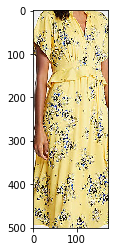

In [15]:
test=cv2.imread('7.jpg')
test=cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
plt.imshow(test)

In [16]:
def prediction(test):
    test=test.reshape(-1,3)
    def input_fn2():
        return tf.train.limit_epochs(
                  tf.convert_to_tensor(test, dtype=tf.float32), num_epochs=1)
    cluster_indices_test = list(kmeans.predict_cluster_index(input_fn2))
    pixel_count=np.zeros((num_clusters))
    for i in cluster_indices_test:    
        pixel_count[i]+=1
    l=np.argmax(pixel_count)
    sample_result=np.zeros((20,20,3))
    sample_result[:,:,0]=cluster_centers_int[l,0]
    sample_result[:,:,1]=cluster_centers_int[l,1]
    sample_result[:,:,2]=cluster_centers_int[l,2]
    sample_result=sample_result.astype(int)
    plt.imshow(sample_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from kmeansmodel/model.ckpt-79
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


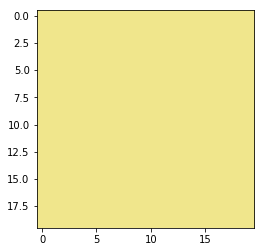

In [17]:
prediction(test)